<a href="https://colab.research.google.com/github/ananya2108/Deep-Learning-and-Data-Analytics-Lab-2025/blob/main/24mcs121_Experiment_no_1_Single_Unit_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Python Packages
1. Math: Provides basic mathematical functions for calculations like square root
logarithms, and trigonometry. Key Functions: sqrt(), log(), sin(), cos().

2. Scipy: Offers advanced scientific tools for optimization, integration, and statistics. Key Functions: optimize.minimize(), integrate.quad(), stats.norm().

3. Numpy: Enables fast numerical computations using arrays and matrices. Key Functions: array(), dot(), random.rand(), linspace().

4. Matplotlib: A library for creating visualizations like line plots, scatter plots, and histograms. Key Functions: plot(), scatter(), hist(), imshow().

5. Pandas: Helps process structured data using DataFrames for cleaning, analyzing, and transforming data. Key Functions: DataFrame(), read_csv(), merge(), groupby().

6. Sklearn (Scikit-learn): Provides machine learning models and tools for data preprocessing and evaluation. Key Functions: Perceptron(), train_test_split(), StandardScaler(), accuracy_score().

7. TensorFlow: A deep learning framework for building, training, and deploying complex neural networks. Key Functions: keras.Sequential(), compile(), fit(), Dense().

8. Keras: A high-level API within TensorFlow that simplifies neural network design. Key Functions: Sequential(), Dense(), Model(), compile().

# **Single unit perceptron for classification of a linearly separable binary dataset without using pre-defined models.**

Accuracy of the Perceptron model: 100.00%


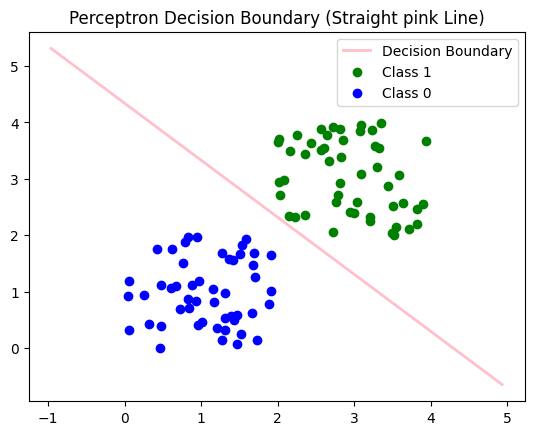

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Generate linearly separable binary data
def generate_data():
    class1 = np.random.uniform(2, 4, (50, 2))
    class0 = np.random.uniform(0, 2, (50, 2))
    X = np.vstack((class1, class0))
    y = np.hstack((np.ones(50), np.zeros(50)))
    return X, y

# Train and test single unit perceptron
X, y = generate_data()

# Train the Perceptron from sklearn
model = Perceptron()
model.fit(X, y)

# Predict on the same data
y_pred = model.predict(X)

# Accuracy analysis
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy of the Perceptron model: {accuracy * 100:.2f}%")

# Coefficients of the perceptron model (weights)
weights = model.coef_[0]
bias = model.intercept_[0]

# Calculate the decision boundary: w1*x1 + w2*x2 + b = 0
# Solve for x2: x2 = -(w1*x1 + b) / w2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x_line = np.linspace(x_min, x_max, 100)
y_line = -(weights[0] * x_line + bias) / weights[1]

# Visualize decision boundary
plt.plot(x_line, y_line, color='pink', linewidth=2, label="Decision Boundary")
plt.scatter(X[:50, 0], X[:50, 1], color='green', label='Class 1')
plt.scatter(X[50:, 0], X[50:, 1], color='blue', label='Class 0')
plt.title("Perceptron Decision Boundary (Straight pink Line)")
plt.legend()
plt.show()


# **Problems with Single Unit Perceptron**



*   *Limited to Linear Separability:*  It can only classify linearly separable data, non-linear patterns (e.g., XOR) cannot be handled
*  *Fixed Decision Boundary:*  The model creates a single straight-line decision boundary, which is insufficient for complex datasets.

*   *No Hidden Layers:*  A single unit perceptron lacks the capability to learn hierarchical or non-linear features.
*   *Binary Classification Only:*  It struggles with multiclass problems, requiring one-vs-one or one-vs-rest approaches.












# Classification of OR, AND, and XOR Data Using Single Unit Perceptron
In this section, we use the single-unit perceptron to classify data generated from logical operations such as OR, AND, and XOR. These operations are fundamental in understanding how a perceptron can handle binary classification tasks, especially when applied to datasets that exhibit linear separability.


1.   ***OR Operation:***
The OR operation returns 1 if at least one of the inputs is 1. This dataset is linearly separable, meaning that a perceptron can effectively classify the data using a single decision boundary.
2.   ***AND Operation:***
The AND operation returns 1 only when both inputs are 1. Similar to the OR operation, the AND dataset is also linearly separable, allowing the perceptron to classify the data successfully.
3.***XOR Operation:***
The XOR operation returns 1 only when the inputs are different. Unlike OR and AND, XOR is not linearly separable. This limitation demonstrates one of the major constraints of a single-unit perceptron, as it cannot correctly classify XOR data with a single linear decision boundary.





Accuracy for OR data: 100.00%


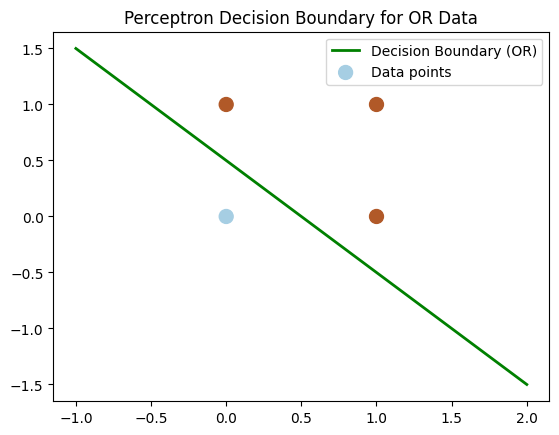

In [4]:
# Generate OR-ed data (input: [0,0], [0,1], [1,0], [1,1])
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])  # OR outputs

# Train the Perceptron model
model_or = Perceptron()
model_or.fit(X_or, y_or)

# Predict on the same data
y_pred_or = model_or.predict(X_or)

# Accuracy analysis for OR data
accuracy_or = accuracy_score(y_or, y_pred_or)
print(f"Accuracy for OR data: {accuracy_or * 100:.2f}%")

# Coefficients of the perceptron model (weights)
weights_or = model_or.coef_[0]
bias_or = model_or.intercept_[0]

# Calculate the decision boundary for OR data
x_min, x_max = X_or[:, 0].min() - 1, X_or[:, 0].max() + 1
x_line = np.linspace(x_min, x_max, 100)
y_line_or = -(weights_or[0] * x_line + bias_or) / weights_or[1]

# Visualize decision boundary for OR data
plt.plot(x_line, y_line_or, color='green', linewidth=2, label="Decision Boundary (OR)")
plt.scatter(X_or[:, 0], X_or[:, 1], c=y_or, cmap=plt.cm.Paired, s=100, label='Data points')
plt.title("Perceptron Decision Boundary for OR Data")
plt.legend()
plt.show()


Accuracy for AND data: 100.00%


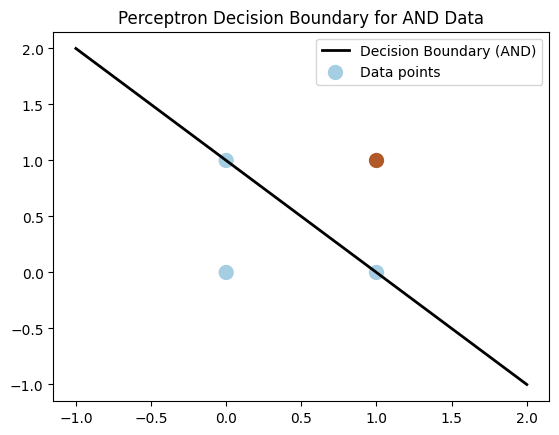

In [5]:
# Generate AND-ed data (input: [0,0], [0,1], [1,0], [1,1])
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])  # AND outputs

# Train the Perceptron model
model_and = Perceptron()
model_and.fit(X_and, y_and)

# Predict on the same data
y_pred_and = model_and.predict(X_and)

# Accuracy analysis for AND data
accuracy_and = accuracy_score(y_and, y_pred_and)
print(f"Accuracy for AND data: {accuracy_and * 100:.2f}%")

# Coefficients of the perceptron model (weights)
weights_and = model_and.coef_[0]
bias_and = model_and.intercept_[0]

# Calculate the decision boundary for AND data
x_min, x_max = X_and[:, 0].min() - 1, X_and[:, 0].max() + 1
x_line = np.linspace(x_min, x_max, 100)
y_line_and = -(weights_and[0] * x_line + bias_and) / weights_and[1]

# Visualize decision boundary for AND data
plt.plot(x_line, y_line_and, color='black', linewidth=2, label="Decision Boundary (AND)")
plt.scatter(X_and[:, 0], X_and[:, 1], c=y_and, cmap=plt.cm.Paired, s=100, label='Data points')  # Increased point size
plt.title("Perceptron Decision Boundary for AND Data")
plt.legend()
plt.show()

Accuracy for XOR data: 50.00%


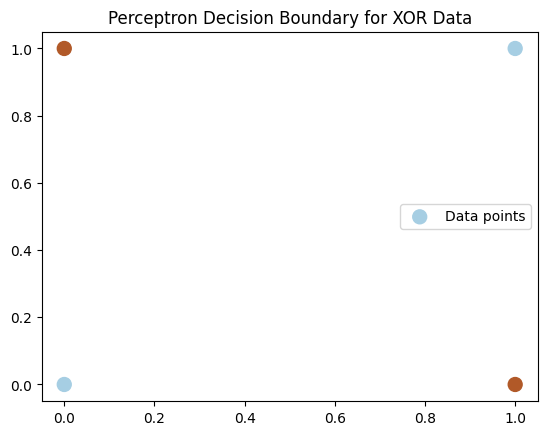

In [6]:
# Generate XOR-ed data (input: [0,0], [0,1], [1,0], [1,1])
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])  # XOR outputs

# Train the Perceptron model
model_xor = Perceptron()
model_xor.fit(X_xor, y_xor)

# Predict on the same data
y_pred_xor = model_xor.predict(X_xor)

# Accuracy analysis for XOR data
accuracy_xor = accuracy_score(y_xor, y_pred_xor)
print(f"Accuracy for XOR data: {accuracy_xor * 100:.2f}%")

# Coefficients of the perceptron model (weights)
weights_xor = model_xor.coef_[0]
bias_xor = model_xor.intercept_[0]

# To avoid division by zero (when the slope is zero), we check if weights_xor[1] is zero
if weights_xor[1] != 0:
    # Calculate the decision boundary for XOR data
    x_min, x_max = X_xor[:, 0].min() - 1, X_xor[:, 0].max() + 1
    x_line = np.linspace(x_min, x_max, 100)
    y_line_xor = -(weights_xor[0] * x_line + bias_xor) / weights_xor[1]

    # Visualize decision boundary for XOR data
    plt.plot(x_line, y_line_xor, color='pink', linewidth=2, label="Decision Boundary (XOR)")
else:
    print("Warning: Decision boundary not calculable due to zero slope.")

plt.scatter(X_xor[:, 0], X_xor[:, 1], c=y_xor, cmap=plt.cm.Paired, s=100, label='Data points')  # Increased point size
plt.title("Perceptron Decision Boundary for XOR Data")
plt.legend()
plt.show()


# **OUTPUT ANALYSIS :**



*   **AND** and **OR** Data: Both are linearly separable, and the Perceptron achieves 100% accuracy with a clear decision boundary successfully classifying the data points.
*   **XOR** Data: XOR is not linearly separable, and the Perceptron fails with only ~50% accuracy. The decision boundary is ineffective due to the non-linear relationship in the data.The Perceptron, being a linear classifier, cannot handle non-linear patterns like XOR, as a single straight line cannot separate the intersecting classes ([0,0] and [1,1] from [0,1] and [1,0]).



# **Classification of MNIST dataset using Single Unit Perceptron**

Accuracy for MNIST Binary Classification (0 vs 1): 99.86%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1402
           1       1.00      1.00      1.00      1554

    accuracy                           1.00      2956
   macro avg       1.00      1.00      1.00      2956
weighted avg       1.00      1.00      1.00      2956



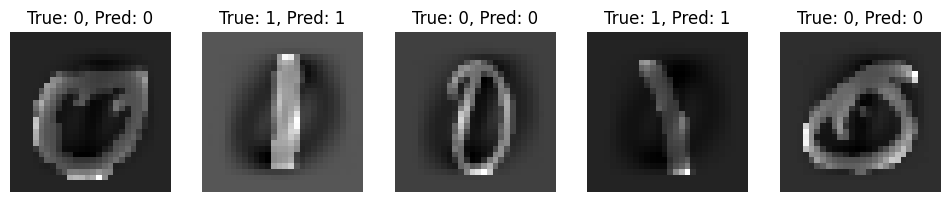

In [7]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

# Binary classification: Filter digits 0 and 1
X_binary = X[(y == 0) | (y == 1)]
y_binary = y[(y == 0) | (y == 1)]

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Perceptron model
model = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Analyze accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for MNIST Binary Classification (0 vs 1): {accuracy * 100:.2f}%")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize some results
import matplotlib.pyplot as plt

# Display a few test samples with their predictions
fig, axes = plt.subplots(1, 5, figsize=(12, 4))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"True: {y_test[i]}, Pred: {y_pred[i]}")
    ax.axis('off')
plt.show()

# **OUTPUT ANALYSIS :**
The Perceptron performs well for binary classification (e.g., 0 vs 1) with high accuracy, as these classes are linearly separable. However, it fails for more than two digits due to its inability to handle non-linear relationships between classes, which are common in the MNIST dataset. For multiclass tasks, models like SVM, Random Forest, or deep learning models like CNNs are required to capture non-linear relationships.